In [117]:
import pandas as pd
import json
from utils import (create_pair_grid, label_players, create_counts_mat, 
                   markdown_table, label_zones)
%matplotlib inline
total_counts = pd.read_csv('data/time_in_location_player.csv', header=None)
total_counts = total_counts.set_index([0,1,2])

In [118]:
count_mat = create_counts_mat(total_counts.xs('of', level=2))
lbl, val = zip(*count_mat.columns.tolist())
count_mat.columns = label_zones(val)
count_mat_zones_players = label_players(count_mat)

In [119]:
# %matplotlib inline
# mat_subset = count_mat_zones_players.iloc[:,[i for i in range(0, 15, 3)]]
# create_pair_grid(mat_subset, save=True, savename='report/player_dist_and_relationships.png')

In [130]:
from sklearn.decomposition import PCA, FactorAnalysis

X = count_mat_zones_players.div(count_mat_zones_players.sum(axis=1), axis=0)
pca = PCA()
X_r = pca.fit(X).transform(X)

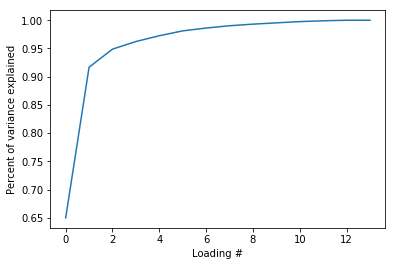

In [129]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Percent of variance explained')
plt.xlabel('Loading #')
plt.savefig('report/cum_pca_offense.png')

In [122]:
import pandas as pd
from zone_classifier import ZoneClassifier
from utils import CourtLoadingsPlotter
classifier = ZoneClassifier('data/train.csv')
data = pd.read_csv('./data/train.csv')
data[['x_loc','y_loc']] = data[['LOC_X','LOC_Y']]
X = data[['x_loc','y_loc']]
zones = label_zones(classifier.label(X))
data['zone'] = zones

/Users/sam/Documents/spring18/stat363/nba_ngrams/zone_classifier.py:71: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.knn.fit(train_x, train_y)


             precision    recall  f1-score   support

        2.0     0.9871    0.9871    0.9871       543
        3.0     0.9777    0.9871    0.9824       311
        4.0     0.9857    1.0000    0.9928        69
        6.0     0.9891    0.9956    0.9924       457
        7.0     0.9956    0.9828    0.9892       232
        8.0     0.9796    1.0000    0.9897        48
        9.0     0.9995    0.9984    0.9989      1850
       10.0     0.9858    0.9858    0.9858       351
       11.0     0.9813    0.9813    0.9813       267
       12.0     0.9828    0.9870    0.9849       231
       15.0     0.9898    0.9878    0.9888       491
       16.0     0.9957    0.9915    0.9936       468
       19.0     0.9944    0.9888    0.9916       358
       20.0     0.9955    0.9978    0.9966       447

avg / total     0.9922    0.9922    0.9922      6123



/Users/sam/miniconda3/envs/data_cleaning/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [132]:
import numpy as np
X_norm = count_mat_zones_players.div(count_mat_zones_players.sum(axis=1), axis=0)
# X_corr = np.cov(count_mat_zones_players.T)
fa = FactorAnalysis(n_components=4)
X_fa_r = fa.fit(X_norm).transform(X_norm)
# fa.components_[0].shape

In [113]:
court_plotter = CourtLoadingsPlotter(data, data.zone.unique())

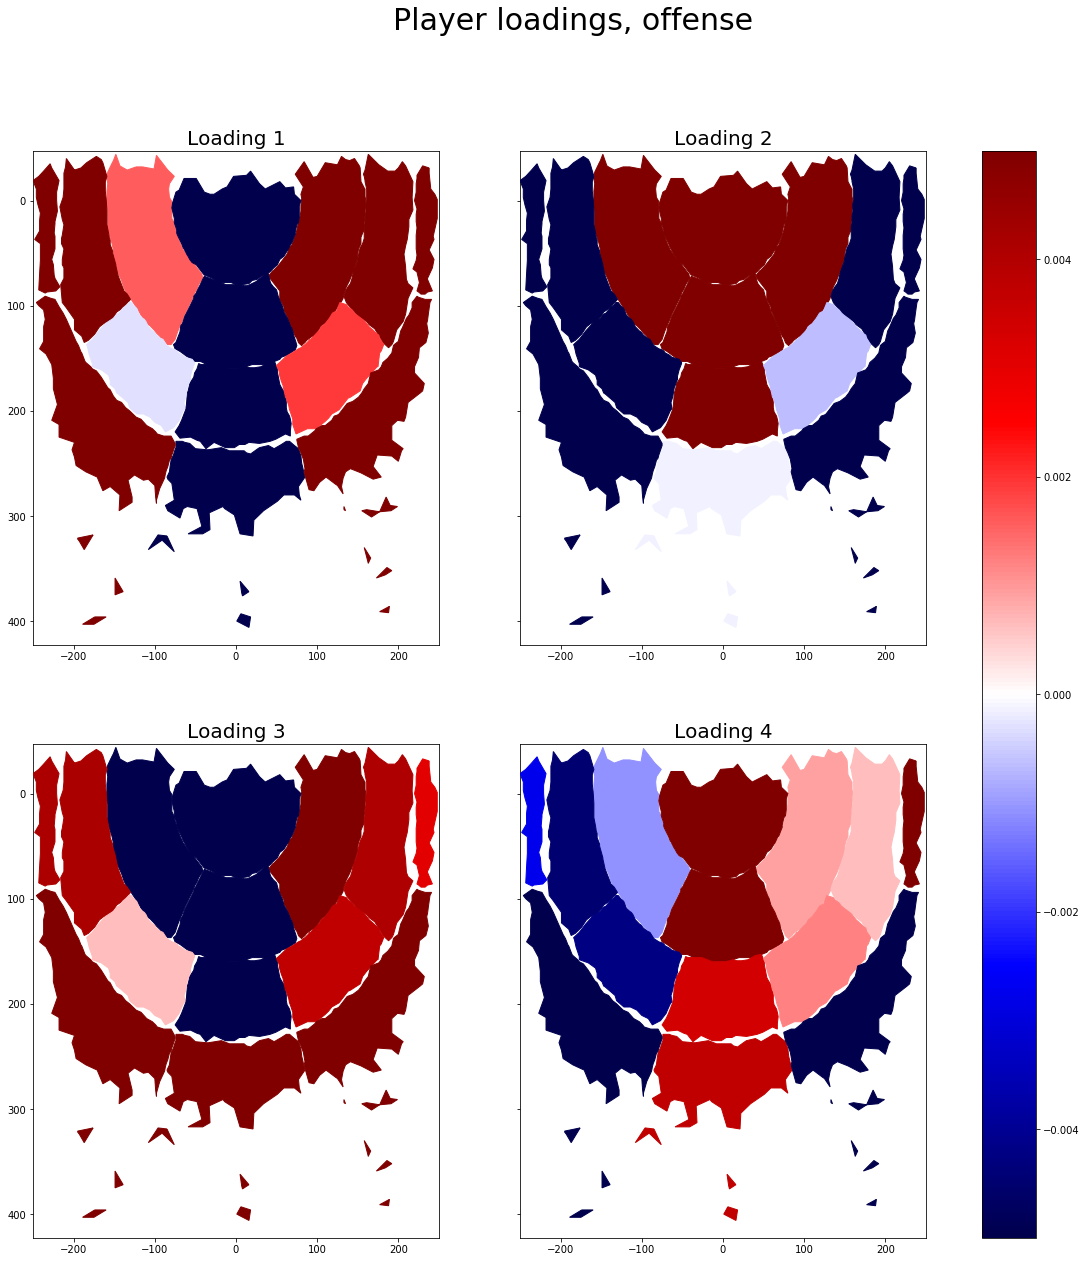

In [133]:
# fig, ax = plt.subplots(figsize=(12,11))
import matplotlib as mpl
f, (axcol1, axcol2) = plt.subplots(2, 2, sharey=True, figsize=(20,20))
ax1, ax2 = axcol1
ax3, ax4 = axcol2
plt.suptitle('Player loadings, offense', fontsize=30)
loadings1 = [(zone, loading) for loading, zone in zip(fa.components_[0], count_mat_zones_players.columns)]
loadings2 = [(zone, loading) for loading, zone in zip(fa.components_[1], count_mat_zones_players.columns)]
loadings3 = [(zone, loading) for loading, zone in zip(fa.components_[2], count_mat_zones_players.columns)]
loadings4 = [(zone, loading) for loading, zone in zip(fa.components_[3], count_mat_zones_players.columns)]


minval = -.005
maxval = 0.005
court_plotter.plot_loadings(ax1, loadings1, minval, maxval, title = "Loading 1")
court_plotter.plot_loadings(ax2, loadings2, minval, maxval, title = "Loading 2")
court_plotter.plot_loadings(ax3, loadings3, minval, maxval, title = "Loading 3")
court_plotter.plot_loadings(ax4, loadings4, minval, maxval, title = "Loading 4")

cax,kw = mpl.colorbar.make_axes([ax1, ax2, ax3, ax4])
cmap = mpl.cm.seismic
norm = mpl.colors.Normalize(vmin=minval, vmax=maxval)
cb1 = mpl.colorbar.ColorbarBase(cax, cmap=cmap,
                                norm=norm,
                                orientation='vertical')

plt.savefig("report/first_4_loadings_players_off.png")

In [64]:
count_mat = create_counts_mat(total_counts.xs('def', level=2))
lbl, val = zip(*count_mat.columns.tolist())
count_mat.columns = label_zones(val)
count_mat_zones_players = label_players(count_mat)

In [135]:
from sklearn.decomposition import PCA, FactorAnalysis

X_norm = count_mat_zones_players.div(count_mat_zones_players.sum(axis=1), axis=0)
pca = PCA()
X_r = pca.fit(X_norm).transform(X_norm)

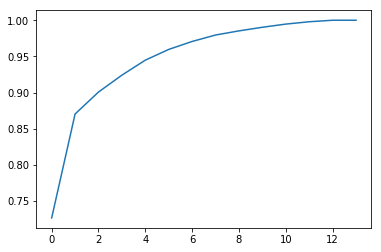

In [136]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [137]:
import numpy as np
fa = FactorAnalysis(n_components=6)
X_fa_r = fa.fit(X_norm).transform(X_norm)

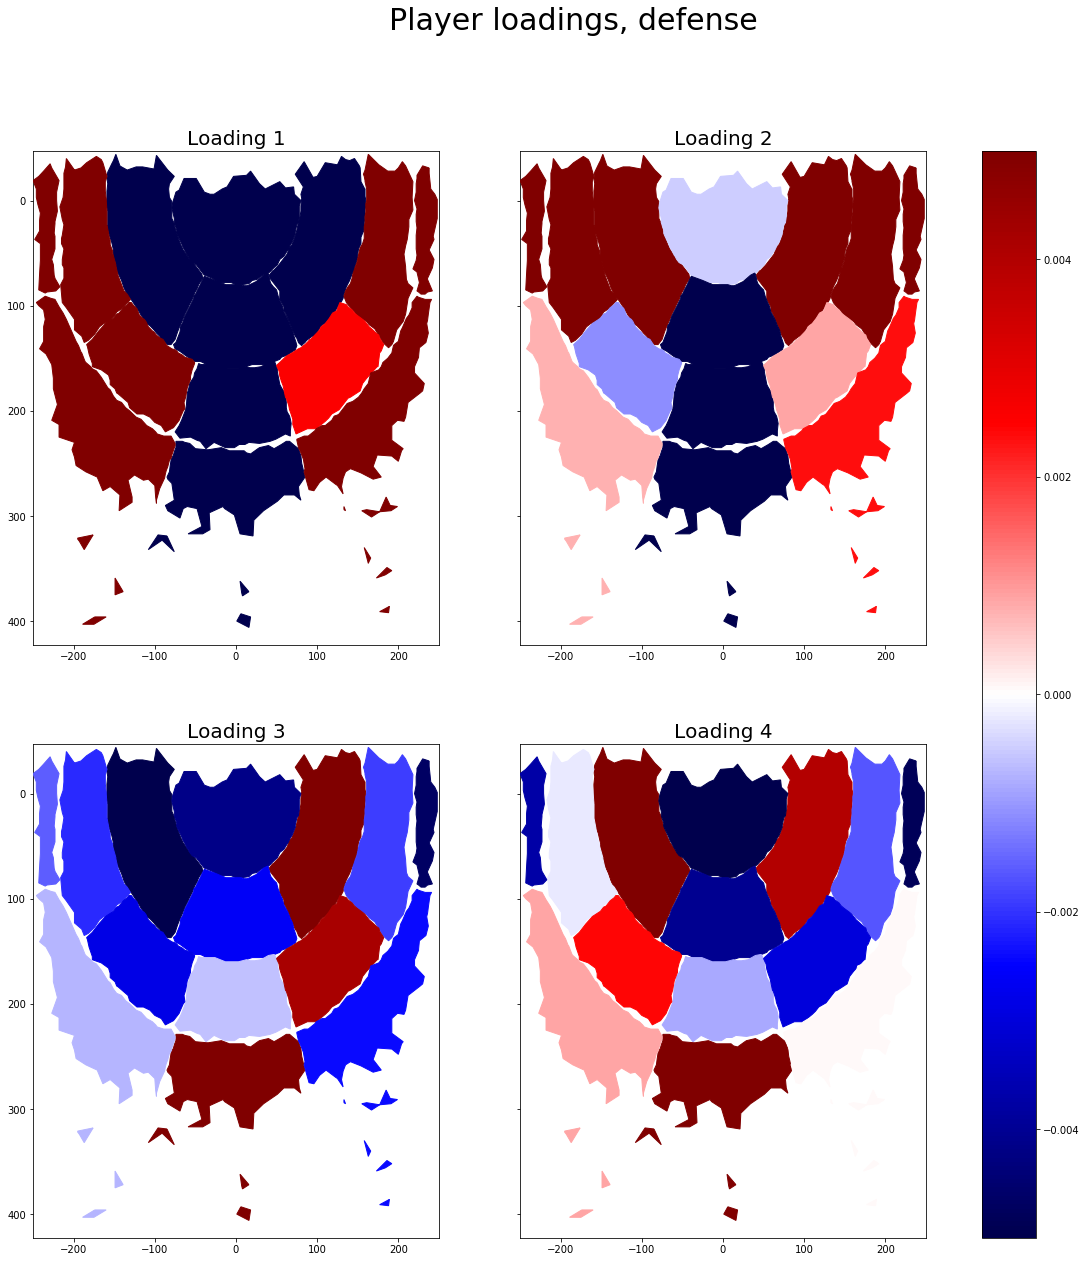

In [138]:
court_plotter = CourtLoadingsPlotter(data, data.zone.unique())

# fig, ax = plt.subplots(figsize=(12,11))
import matplotlib as mpl
f, (axcol1, axcol2) = plt.subplots(2, 2, sharey=True, figsize=(20,20))
ax1, ax2 = axcol1
ax3, ax4 = axcol2
plt.suptitle('Player loadings, defense', fontsize=30)
loadings1 = [(zone, loading) for loading, zone in zip(fa.components_[0], count_mat_zones_players.columns)]
loadings2 = [(zone, loading) for loading, zone in zip(fa.components_[1], count_mat_zones_players.columns)]
loadings3 = [(zone, loading) for loading, zone in zip(fa.components_[2], count_mat_zones_players.columns)]
loadings4 = [(zone, loading) for loading, zone in zip(fa.components_[3], count_mat_zones_players.columns)]


minval = -.005
maxval = 0.005
court_plotter.plot_loadings(ax1, loadings1, minval, maxval, title = "Loading 1")
court_plotter.plot_loadings(ax2, loadings2, minval, maxval, title = "Loading 2")
court_plotter.plot_loadings(ax3, loadings3, minval, maxval, title = "Loading 3")
court_plotter.plot_loadings(ax4, loadings4, minval, maxval, title = "Loading 4")

cax,kw = mpl.colorbar.make_axes([ax1, ax2, ax3, ax4])
cmap = mpl.cm.seismic
norm = mpl.colors.Normalize(vmin=minval, vmax=maxval)
cb1 = mpl.colorbar.ColorbarBase(cax, cmap=cmap,
                                norm=norm,
                                orientation='vertical')

plt.savefig("report/first_4_loadings_players_def.png")

# Teams

In [139]:
from utils import label_teams
total_counts = pd.read_csv('data/time_in_location_team.csv', header=None)
total_counts = total_counts.set_index([0,1,2])

count_mat = create_counts_mat(total_counts.xs('of', level=2))
lbl, val = zip(*count_mat.columns.tolist())
count_mat.columns = label_zones(val)
count_mat_zones_teams = label_teams(count_mat)

In [140]:
from sklearn.decomposition import PCA, FactorAnalysis

X = count_mat_zones_teams.div(count_mat_zones_teams.sum(axis=1), axis=0)
pca = PCA()
X_r = pca.fit(X).transform(X)

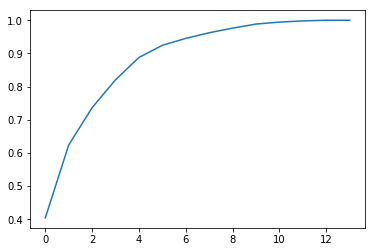

In [27]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [141]:
import numpy as np
# X_corr = np.corrcoef(count_mat_zones_teams.T)
fa = FactorAnalysis(n_components=6)
X_fa_r = fa.fit(X).transform(X)

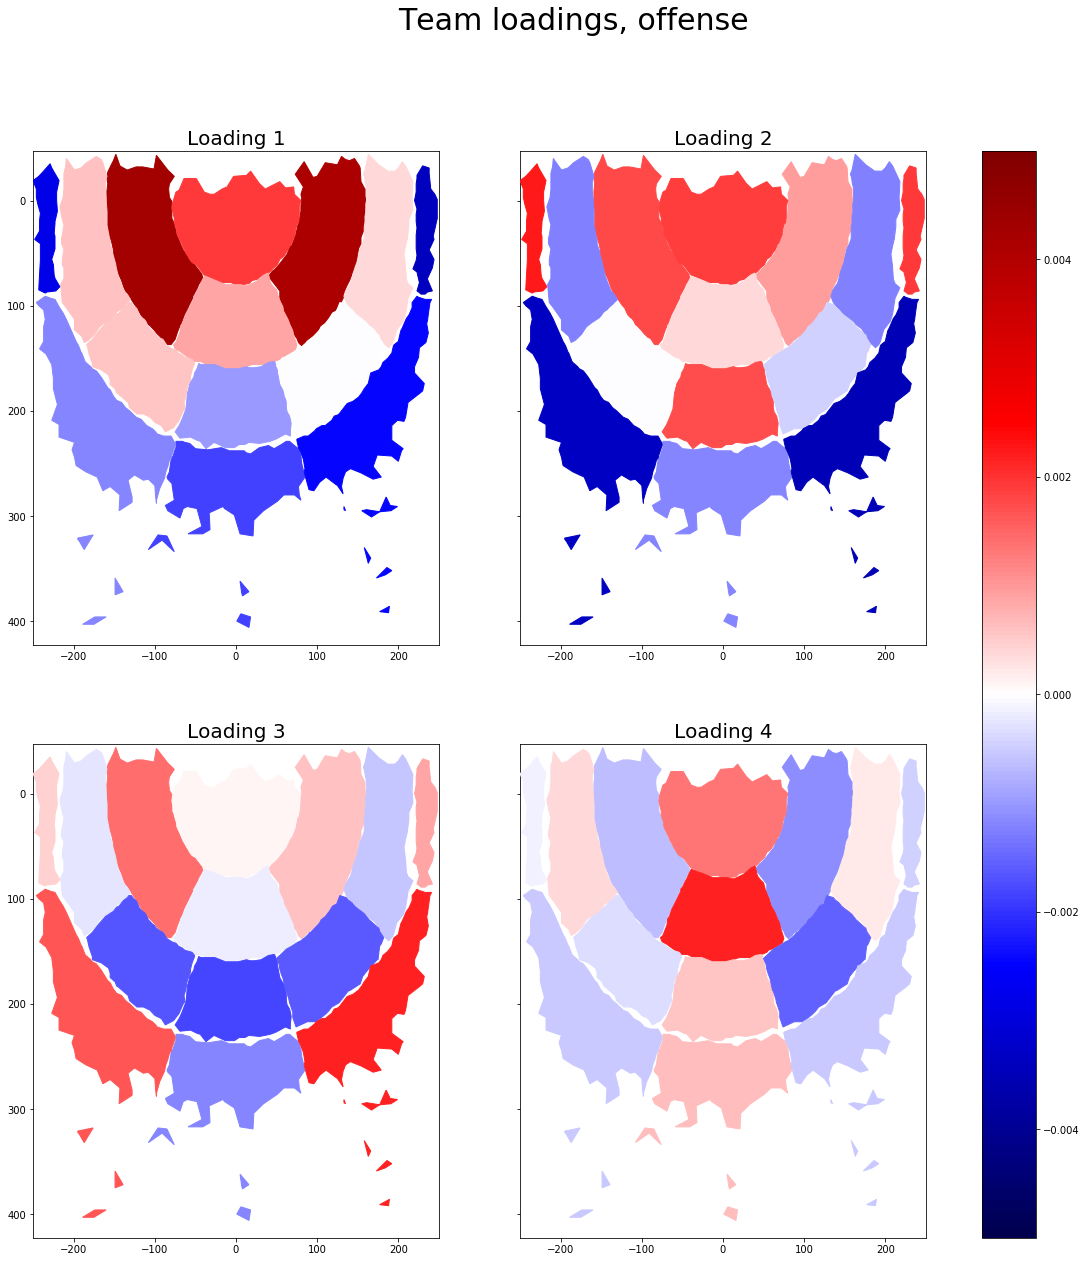

In [142]:
# fig, ax = plt.subplots(figsize=(12,11))
import matplotlib as mpl
f, (axcol1, axcol2) = plt.subplots(2, 2, sharey=True, figsize=(20,20))
ax1, ax2 = axcol1
ax3, ax4 = axcol2
plt.suptitle('Team loadings, offense', fontsize=30)
loadings1 = [(zone, loading) for loading, zone in zip(fa.components_[0], count_mat_zones_teams.columns)]
loadings2 = [(zone, loading) for loading, zone in zip(fa.components_[1], count_mat_zones_teams.columns)]
loadings3 = [(zone, loading) for loading, zone in zip(fa.components_[2], count_mat_zones_teams.columns)]
loadings4 = [(zone, loading) for loading, zone in zip(fa.components_[3], count_mat_zones_teams.columns)]


minval = -.005
maxval = 0.005
court_plotter.plot_loadings(ax1, loadings1, minval, maxval, title = "Loading 1")
court_plotter.plot_loadings(ax2, loadings2, minval, maxval, title = "Loading 2")
court_plotter.plot_loadings(ax3, loadings3, minval, maxval, title = "Loading 3")
court_plotter.plot_loadings(ax4, loadings4, minval, maxval, title = "Loading 4")

cax,kw = mpl.colorbar.make_axes([ax1, ax2, ax3, ax4])
cmap = mpl.cm.seismic
norm = mpl.colors.Normalize(vmin=minval, vmax=maxval)
cb1 = mpl.colorbar.ColorbarBase(cax, cmap=cmap,
                                norm=norm,
                                orientation='vertical')

plt.savefig("report/first_4_loadings_teams_off.png")

In [143]:
from utils import label_teams
total_counts = pd.read_csv('data/time_in_location_team.csv', header=None)
total_counts = total_counts.set_index([0,1,2])

count_mat = create_counts_mat(total_counts.xs('def', level=2))
lbl, val = zip(*count_mat.columns.tolist())
count_mat.columns = label_zones(val)
count_mat_zones_teams = label_teams(count_mat)

In [144]:
from sklearn.decomposition import PCA, FactorAnalysis

X = count_mat_zones_teams.div(count_mat_zones_teams.sum(axis=1), axis=0)
pca = PCA()
X_r = pca.fit(X).transform(X)

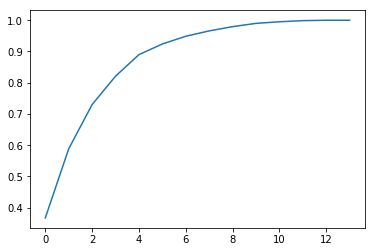

In [145]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [147]:
import numpy as np
X_corr = np.cov(count_mat_zones_teams.T)
fa = FactorAnalysis(n_components=6)
X_fa_r = fa.fit(X).transform(X)

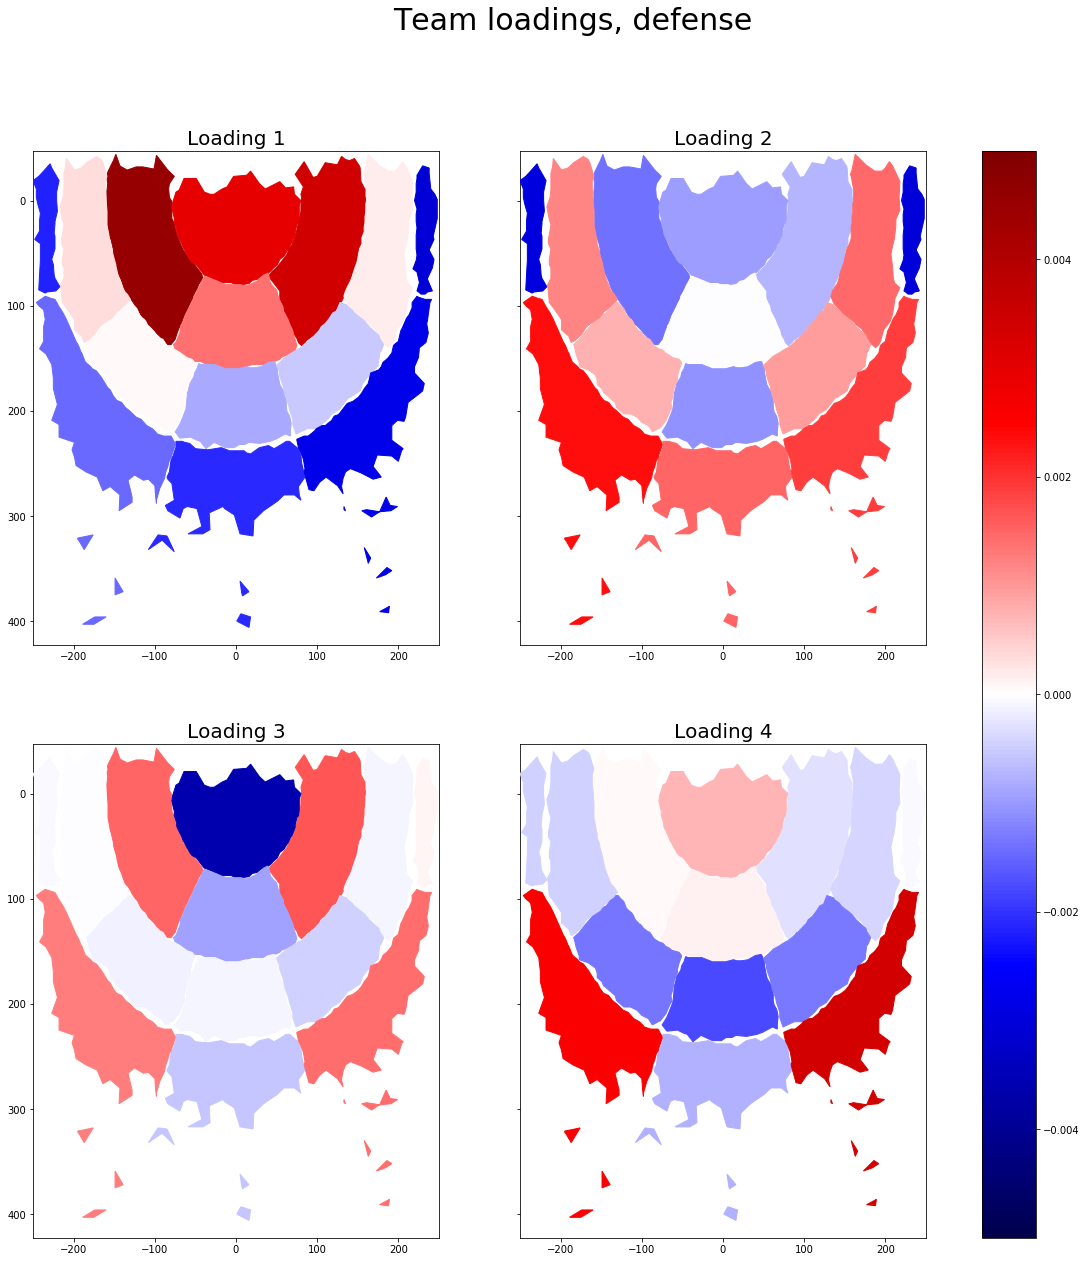

In [148]:
# fig, ax = plt.subplots(figsize=(12,11))
import matplotlib as mpl
f, (axcol1, axcol2) = plt.subplots(2, 2, sharey=True, figsize=(20,20))
ax1, ax2 = axcol1
ax3, ax4 = axcol2
plt.suptitle('Team loadings, defense', fontsize=30)
loadings1 = [(zone, loading) for loading, zone in zip(fa.components_[0], count_mat_zones_teams.columns)]
loadings2 = [(zone, loading) for loading, zone in zip(fa.components_[1], count_mat_zones_teams.columns)]
loadings3 = [(zone, loading) for loading, zone in zip(fa.components_[2], count_mat_zones_teams.columns)]
loadings4 = [(zone, loading) for loading, zone in zip(fa.components_[3], count_mat_zones_teams.columns)]


minval = -.005
maxval = 0.005
court_plotter.plot_loadings(ax1, loadings1, minval, maxval, title = "Loading 1")
court_plotter.plot_loadings(ax2, loadings2, minval, maxval, title = "Loading 2")
court_plotter.plot_loadings(ax3, loadings3, minval, maxval, title = "Loading 3")
court_plotter.plot_loadings(ax4, loadings4, minval, maxval, title = "Loading 4")

cax,kw = mpl.colorbar.make_axes([ax1, ax2, ax3, ax4])
cmap = mpl.cm.seismic
norm = mpl.colors.Normalize(vmin=minval, vmax=maxval)
cb1 = mpl.colorbar.ColorbarBase(cax, cmap=cmap,
                                norm=norm,
                                orientation='vertical')

plt.savefig("report/first_4_loadings_teams_def.png")